In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.interpolate as interp
import scipy.stats as stats
import scipy.optimize as opt
import corner

%matplotlib inline

In [73]:
fig_width_pt = 246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
# Explicitly set fontsizes:
font_size = 10
tick_size = 8

def load_params():
    return {
              #'backend': 'ps',
              'axes.labelsize': font_size,
              'text.fontsize': font_size,
              'legend.fontsize': font_size,
              'xtick.labelsize': tick_size,
              'ytick.labelsize': tick_size,
              'text.usetex': True,
              'figure.figsize': fig_size,
              }

def set_params(params):
    plt.rcParams.update(params)

    
#plot_settings()

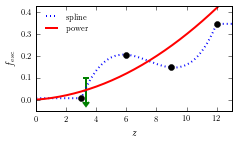

In [68]:
#Plot that shows the possible functions
def power(z,f_8,alpha):
    return np.min( [np.max([f_8*((z+1.0)/9.0)**alpha,0.0]), 1.0])

def tanh(z,f_0,f_inf,z_half,dz):
    t = np.tanh((z-z_half)/dz)
    return 0.5*(f_inf-f_0)*t+0.5*(f_inf+f_0)

def knots(z, z_knots, f_knots, style):
    
    if z<3.0:
        return f_knots[0]
    elif z>12.0:
        return f_knots[-1]
    else:
    
        func = interp.interp1d(z_knots, f_knots, kind=style)
    
    return np.min([np.max([0.0,func(z)]), 1.0])

inch_size = 246.0/72.0
fig = plt.figure(figsize=(inch_size, inch_size*golden_mean))
ax = fig.add_subplot(111)

#fig_size =  [fig_width,fig_height*1.0]
#params = load_params()
#plt.rcParams.update(params)
#plot_settings()


    
    
z_pos = np.linspace(0,20,200)

#Knots
nknots=4
#z_knots = np.linspace(0,25,nknots)
z_knots = np.linspace(3,12,nknots)

f_knots = np.random.uniform(0,1,nknots) 

#print f_knots
f_knots = np.array([ 0.02235351,  0.51514863,  0.37060074,  0.86430903])*0.4

fesc = map(lambda x: knots(x,z_knots,f_knots,'cubic'),z_pos)
fesc2 = map(lambda x: knots(x,z_knots,f_knots,'linear'),z_pos)

plot_knots, = ax.plot(z_pos,fesc,'b',linewidth=2.0,linestyle='dotted')
#ax.plot(z_pos,fesc2,'b--',linewidth=1.5)

ax.plot(z_knots,f_knots,'ko',linewidth=2.0)


#Power law
fesc = map(lambda x: power(x,0.2,2.0), z_pos)
plot_power, = ax.plot(z_pos,fesc,'r',linewidth=2.0, linestyle='solid')

#Tanh
#fesc = map(lambda x: tanh(x,0.1,0.9,6.0,0.75), z_pos)
#fesc = map(lambda x: tanh(x,0.1,0.9,6.0,0.1), z_pos)
#plot_tanh, = ax.plot(z_pos,fesc,'k',linewidth=2.0, linestyle='dashed')

ax.errorbar([3.3],[0.1],yerr=0.125,uplims=[0.5],capsize=3,elinewidth=2.0,capthick=2.0)

#ax.set_ylim([-0.05,1.025])
ax.set_ylim([-0.05,0.425])

ax.set_xlim([0,13])


ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$f_\mathrm{esc}$')


#plt.setp(ax.get_xticklabels(), visible=False)


plt.legend([plot_knots, plot_power], 
           [r'$\mathrm{spline}$', r'$\mathrm{power}$'],
          loc='upper left',
          fontsize=8,
          frameon=False)

fig.tight_layout()

save=True
if save:
    direct='/Users/laynep/work/papers/reionization/plots/'
    plt.savefig(direct+'fesc_priors.pdf')


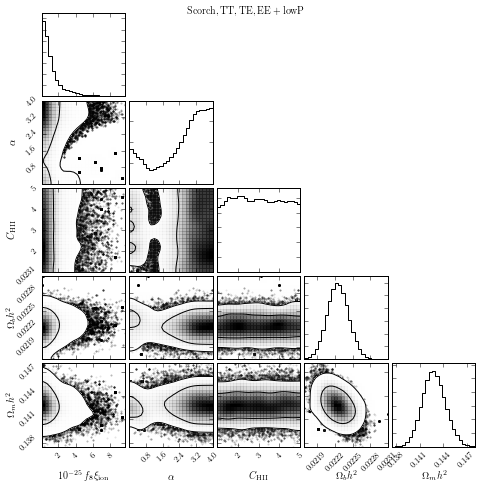

In [228]:
#Triangle plot for power law model

direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'
data = np.loadtxt(direct+'chain_power_TTTEEE.dat')

params = load_params()
plt.rcParams.update(params)

burnin = 50000 

to_plot = data[burnin:,:]
to_plot2 = []
xi_index = 4
for here in to_plot:
    if here[xi_index]>24.0:# and here[3]<4 and here[3]>2 and here[4]<-9.5 and here[4]>-10.5 and here[5]>-0.36 and here[5]<-0.34 :
#        #here[-1]=10.0**here[-1]

        here2 = here
#        #print here2, here2[1], here2[-1]
#        #sys.exit()
        here2[1]=here2[1]*1e1**here2[xi_index]*1e-25
        #to_plot2.append(here2[:-1])
        to_plot2.append(here2)
to_plot = np.array(to_plot2)
#to_plot = to_plot[0::2,:]

to_plot = to_plot[:, [1,2,3,5,6]]

inch_size = 246.0*2.0/72.0

params = load_params()

fig = plt.figure(figsize=(inch_size, inch_size))
#ax = fig.add_subplot(111)
#plot_settings(size=246.0*2.0)

corner.corner(to_plot, 
                       figure=fig,
                       labels=[r'$ 10^{-25} \, f_8 \xi_{\rm ion}$', r'$\alpha$', r'$C_\mathrm{HII}$', 
                               r'$\Omega_b h^2$',r'$\Omega_m h^2$'],
                       levels=[0.68,0.95],
                       color=u'k',
                       smooth=1.75,
                       bins=25, 
                       linewidth=2.0,
                       fontsize=13,
                       figsize = (inch_size, inch_size),
                       cmap='Blues',
                       smooth1d=1.25)

fig = plt.gcf()
fig.set_size_inches(inch_size, inch_size)
#fig.savefig('test2png.png', dpi=100)

fig.suptitle(r'${\rm Scorch, TT,TE,EE+lowP}$')


save=True
if save:
    direct='/Users/laynep/work/papers/reionization/plots/'
    plt.savefig(direct+'corner_power_TTTEEE_Scorch.pdf')

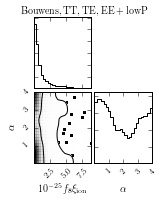

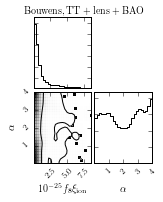

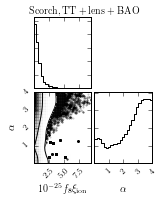

In [227]:
#Reduced triangle plots for alt power law model

direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'
data = np.loadtxt(direct+'chain_power_TTTEEE_Bouwens.dat')
name_list = ['chain_power_TTTEEE_Bouwens','chain_power_lensing_BAO_Bouwens','chain_power_lensing_BAO']

burnin= 50000

for name in name_list:
    data = np.loadtxt(direct+name +'.dat')
    
    params = load_params()
    plt.rcParams.update(params)

    to_plot = data[burnin:,:]
    to_plot2 = []
    xi_index = 4
    for here in to_plot:
        if here[xi_index]>24.0:# and here[3]<4 and here[3]>2 and here[4]<-9.5 and here[4]>-10.5 and here[5]>-0.36 and here[5]<-0.34 :
    #        #here[-1]=10.0**here[-1]

            here2 = here
    #        #print here2, here2[1], here2[-1]
    #        #sys.exit()
            here2[1]=here2[1]*1e1**here2[xi_index]*1e-25
            #to_plot2.append(here2[:-1])
            to_plot2.append(here2)
    to_plot = np.array(to_plot2)
    #to_plot = to_plot[0::2,:]

    to_plot = to_plot[:, [1,2]]

    inch_size = 246.0*2/72.0/3.1

    params = load_params()

    fig = plt.figure(figsize=(inch_size, inch_size))
    #ax = fig.add_subplot(311)
    #plot_settings(size=246.0*2.0)

    corner.corner(to_plot, 
                           figure=fig,
                           labels=[r'$10^{-25} f_8 \xi_{\rm ion} $', r'$\alpha$', r'$C_\mathrm{HII}$', 
                                   r'$\Omega_b h^2$',r'$\Omega_m h^2$'],
                           levels=[0.68,0.95],
                           color=u'k',
                           smooth=1.75,
                           bins=25, 
                           linewidth=2.0,
                           max_n_ticks=4,
                           #fontsize=10,
                           smooth1d=1.25)

    fig = plt.gcf()
    fig.set_size_inches(inch_size, inch_size*2*golden_mean)
      
    
    if 'Bouwens' in name:
        if 'BAO' in name:
            fig.suptitle(r'${\rm Bouwens, TT+lens+BAO}$')
        else:
            fig.suptitle(r'${\rm Bouwens, TT,TE,EE+lowP}$')

    else:
        fig.suptitle(r'${\rm Scorch, TT+lens+BAO}$')


    save=True
    if save:
        direct2='/Users/laynep/work/papers/reionization/plots/'
        plt.savefig(direct2+name +'.pdf')

chain_polint_TTTEEE.dat
chain_polint_TTTEEE_Bouwens.dat
chain_polint_lensing_BAO.dat
chain_polint_lensing_BAO_Bouwens.dat


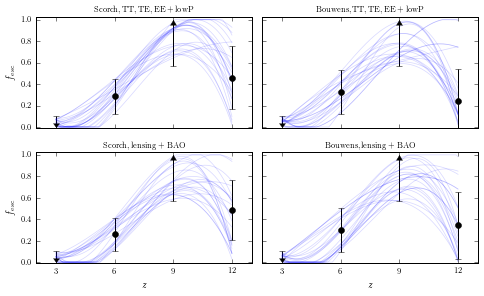

In [280]:
#Error bar plot for knotted sky f_esc
direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'
data_list = ['chain_polint_TTTEEE.dat','chain_polint_TTTEEE_Bouwens.dat', 'chain_polint_lensing_BAO.dat',  'chain_polint_lensing_BAO_Bouwens.dat']


inch_size = 2*246.0/72.0
fig = plt.figure(figsize=(inch_size, inch_size*golden_mean))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax_list=[ax1,ax2,ax3,ax4]

params = load_params()
plt.rcParams.update(params)

def knots(z, z_knots, f_knots, style):
    
    if z<3.0:
        return f_knots[0]
    elif z>12.0:
        return f_knots[-1]
    else:
    
        func = interp.interp1d(z_knots, f_knots, kind=style)
    
    return np.min([np.max([0.0,func(z)]), 1.0])

burnin=80000

for name, ax in zip(data_list,ax_list):
    print name
    data = np.loadtxt(direct+name)
    data = data[burnin:]
    
    data = np.array([row for row in data if row[1]<row[2] <row[3]])

    z_knots = np.linspace(3,12,4)
    nknots = len(z_knots)
    f_knots = data[:,1:nknots+1]

    z_vals = np.linspace(3,12,200)
    
    #Mean +/- 1 sig for f_6 and f_12
    mean_z = [np.mean(dat) for dat in f_knots.T]
    err_z = [np.sqrt(np.var(dat))for dat in f_knots.T]
    
    #Change f_9 to lower limit at 68% CI assuming linear PDF
    mean_z[2]=np.sqrt(1.0-0.68)
    err_z[2] = 1.0-mean_z[2]
    
    #Change f_3 to upper limit at 68% CI assuming linear PDF
    mean_z[0]=0.1
    err_z[0] = 0.1
    

    
    f_knots = np.array([knt for knt in f_knots if err_z[1]>np.abs(knt[1]-mean_z[1]) and mean_z[2]<knt[2]])
    f_knots_rand = np.random.choice(f_knots.shape[0],size=(25,))
    f_knots_rand = f_knots[f_knots_rand]
    
    f_knots2 = np.array([knt for knt in data[:,1:nknots+1] if 2*err_z[1]>np.abs(knt[1]-mean_z[1]) and np.sqrt(1.0-0.95)<knt[2]])
    f_knots_rand2 = np.random.choice(f_knots2.shape[0],size=(25,))
    f_knots_rand2 = f_knots2[f_knots_rand2]
    #print f_knots_rand

    #for fkn in f_knots_rand2:
    #    f_vals2 = map( lambda x: knots(x, z_knots, fkn, 'cubic'), z_vals)
    #    #ax.plot(z_vals, f_vals2, 'b-', alpha=0.15, linewidth=0.75 )
    #    ax.plot(z_vals, f_vals2, 'g-', alpha=0.075, linewidth=2.5 )

    for fkn in f_knots_rand:
        f_vals2 = map( lambda x: knots(x, z_knots, fkn, 'cubic'), z_vals)
        ax.plot(z_vals, f_vals2, 'b-', alpha=0.15, linewidth=0.75 )        



    ax.errorbar(z_knots[1],mean_z[1],  yerr = err_z[1],  color='k',fmt='o')
    ax.errorbar(z_knots[3],mean_z[3],  yerr = err_z[3],  color='k',fmt='o')
    
    #Change f_12 to upper and lower limit at bounds because it's uniform
    #mean_z[3]=[0.0,1.0]
    #err_z[3]=[0.4,0.4]
    #ax.errorbar(z_knots[3],mean_z[3][0], yerr=err_z[3][0],
    #            lolims=[1.0],capsize=3.0, color='k',alpha=0.75,linewidth=1.5,fmt='x')
    #ax.errorbar(z_knots[3],mean_z[3][1], yerr=err_z[3][1],
    #            uplims=[0.1],capsize=3.0, color='k',alpha=0.75,linewidth=1.5,fmt='x')

    ax.errorbar(z_knots[2],mean_z[2], yerr=err_z[2],
                lolims=[1.0],capsize=3.0, color='k')
    ax.errorbar(z_knots[0],mean_z[0], yerr=err_z[0],
                uplims=[0.1],capsize=3.0, color='k')
    

    ax.set_ylim([-0.01,1.025])
    ax.set_xlim([2,13])
    ax.set_xticks([3,6,9,12])
    #ax.set_yticks([0,0.25,0.5])

ax3.set_xlabel(r'$z$')
ax4.set_xlabel(r'$z$')

ax1.set_ylabel(r'$f_\mathrm{esc}$')
ax3.set_ylabel(r'$f_\mathrm{esc}$')

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax4.set_yticklabels([])

ax1.set_title(r'${\rm Scorch, TT,TE,EE+lowP }$',fontsize=8)
ax3.set_title(r'${\rm Scorch, lensing+BAO }$',fontsize=8)

ax2.set_title(r'${\rm Bouwens, TT,TE,EE+lowP }$',fontsize=8)
ax4.set_title(r'${\rm Bouwens, lensing+BAO }$',fontsize=8)





plt.tight_layout()

save=True
if save:
    direct='/Users/laynep/work/papers/reionization/plots/'
    plt.savefig(direct+'polint_errorplot.pdf')



In [245]:
ax.errorbar?

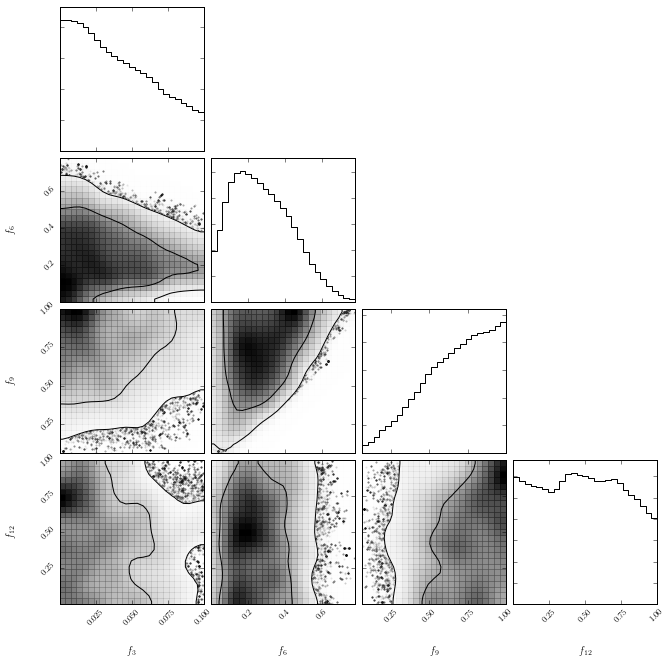

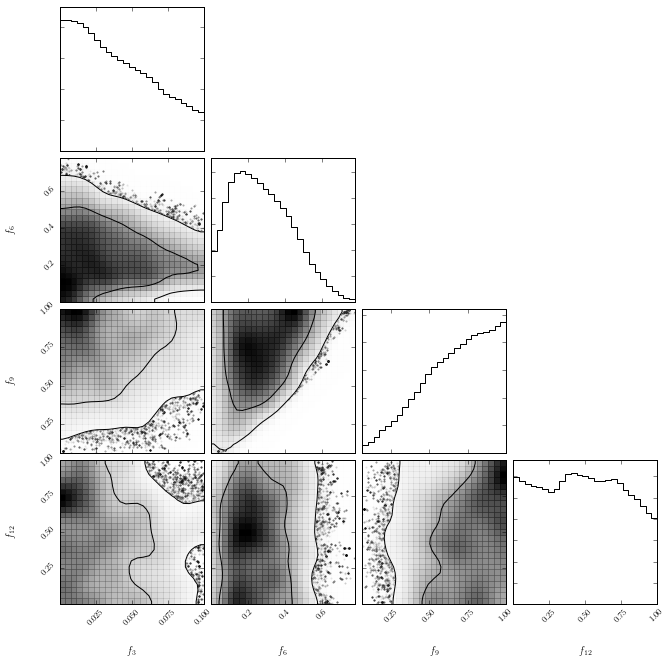

In [257]:
#Joint constraints on f_esc from polint
#Error bar plot for knotted sky f_esc
direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'
data_list = ['chain_polint_TTTEEE.dat', 'chain_polint_lensing_BAO.dat','chain_polint_TTTEEE_Bouwens.dat',  'chain_polint_lensing_BAO_Bouwens.dat']


inch_size = 246.0/72.0
fig = plt.figure(figsize=(inch_size, inch_size*golden_mean))
#ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(212)

burnin=80000

ax_list=[ax1,ax2]

params = load_params()
plt.rcParams.update(params)

data1 = np.loadtxt(direct+data_list[0])[burnin:]
data2 = np.loadtxt(direct+data_list[1])[burnin:]

data1 = np.array([row for row in data1 if row[1]<row[2] <row[3]])
data2 = np.array([row for row in data2 if row[1]<row[2] <row[3]])


corner.corner(data2[:,[1,2,3,4]], 
                       figure=fig,
                       labels=[r'$f_3$',r'$f_6$', r'$f_9$',r'$f_{12}$'],
                       levels=[0.68,0.95],
                       color=u'k',
                       smooth=1.75,
                       bins=25, 
                       linewidth=2.0,
                       max_n_ticks=4,
                       #fontsize=10,
                       smooth1d=1.25)

In [149]:
corner.corner?

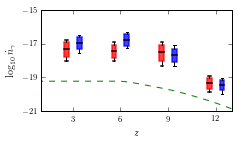

In [220]:
#Error bar plot for knotted sky ionizing emissitivity
direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'

inch_size = 246.0/72.0
fig = plt.figure(figsize=(inch_size, inch_size*golden_mean))

#gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
#ax1 = plt.subplot(gs[0])
#ax2 = plt.subplot(gs[1])

ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(122)


params = load_params()
plt.rcParams.update(params)

burnin=100000

data1 = np.loadtxt(direct+'chain_ngamma_TTTEEE.dat')[burnin:,1:5]
data2 = np.loadtxt(direct+'chain_ngamma_lensing_BAO.dat')[burnin:,1:5]

mean1 = [np.mean(dat) for dat in data1.T]
std1 = [np.sqrt(np.var(dat))for dat in data1.T]

mean2 = [np.mean(dat) for dat in data2.T]
std2 = [np.sqrt(np.var(dat))for dat in data2.T]

z_knots = np.linspace(3,12,4)

#plot1=ax1.errorbar(z_knots,mean1,  yerr = std1, fmt='o', color='r',linewidth=2.0)
#plot2= ax1.errorbar(z_knots+0.5,mean2,  yerr = std2, fmt='x', color='b',linewidth=2.0)
#plot1_2=ax2.errorbar(z_knots,mean1,  yerr = std1, fmt='o', color='r',linewidth=2.0)
#plot2_2= ax2.errorbar(z_knots+0.15,mean2,  yerr = std2, fmt='x', color='b',linewidth=2.0)

plot1 = ax1.boxplot(np.log10(data1),positions=[2.6,5.6,8.6,11.6],notch=False,sym='',widths=0.3,
                   labels=[r'$3$',r'$6$',r'$9$',r'$12$'],patch_artist=True,whis=[16,84])
for box in plot1['boxes']:
    # change outline color
    box.set( color='red', linewidth=1.5)
    # change fill color
    box.set( facecolor = 'red', alpha=0.75 )
plt.setp(plot1['whiskers'], color='black',linewidth=1.0,linestyle='-')
plt.setp(plot1['caps'], color='black',linewidth=1.5,linestyle='-')
plt.setp(plot1['medians'], color='black',linewidth=1.5,linestyle='-')


plot2 = ax1.boxplot(np.log10(data2),positions=[3.4,6.4,9.4,12.4],notch=False,sym='',widths=0.3,
                                      labels=[r'$3$',r'$6$',r'$9$',r'$12$'],patch_artist=True,whis=[16,84])
for box in plot2['boxes']:
    # change outline color
    box.set( color='blue', linewidth=1.5)
    # change fill color
    box.set( facecolor = 'blue', alpha=0.75 )
plt.setp(plot2['whiskers'], color='black',linewidth=1.0,linestyle='-')
plt.setp(plot2['medians'], color='black',linewidth=1.5,linestyle='-')


#Reference values
data1 = np.loadtxt(direct+'reference/ngamma_Scorch.txt')

plot3, = ax1.plot(data1[:,0],np.log10(data1[:,1]),'g--')
plot3_2, = ax2.plot(data1[:,0],data1[:,1],'g--')


plt.xlim([1,13])
ax1.set_xticks([3,6,9,12])
ax1.set_ylim([-20.5,-16.5])
ax1.set_yticks([-21,-19,-17,-15])




#ax1.legend([plot1, plot2,plot3], 
#           [r'$\mathrm{TTTEEE+lowP}$', r'$\mathrm{lens+BAO}$',r'$\mathrm{GLF}$'],
#          loc='upper right',
#          fontsize=6,
#           ncol=2,
#          frameon=False)

ax1.set_xlabel(r'$z$')
ax1.set_ylabel(r'$\log_{10} \dot n_{\gamma}$')



plt.tight_layout()

save=True
if save:
    direct='/Users/laynep/work/papers/reionization/plots/'
    plt.savefig(direct+'ngamma_errorplot.pdf')
    


In [92]:
data = np.loadtxt('/Users/laynep/work/reionization/importance_sampler/python_implementation/'+'lcdm_tau_lensing.txt')

#histbins = plt.hist(data,bins=35,range=[0.0675,0.0901],normed=True)
histbins = plt.hist(data,bins=35,range=[0.06,0.095],normed=True)


for x in zip(histbins[0],histbins[1]):
    print x[0],x[1]

IOError: [Errno 2] No such file or directory: '/Users/laynep/work/reionization/importance_sampler/python_implementation/lcdm_tau_lensing.txt'

In [ ]:
#Best-fit Schecter parameters from 1506.01035

z_list = np.linspace(0,15,25)
M_list = -20.97 + 0.17*(z_list-6.0)
phi_list = 0.45*10.0**(-0.21*(z_list-6.0))*1e-3
alpha_list = -1.91 - 0.13*(z_list-6.0)

for out in zip(z_list,phi_list,M_list,alpha_list):
    print out[:]

In [ ]:
#Planck chains
data1 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB/base_plikHM_TTTEEE_lowTEB_1.txt')
data2 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB/base_plikHM_TTTEEE_lowTEB_2.txt')
data3 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB/base_plikHM_TTTEEE_lowTEB_3.txt')
data4 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB/base_plikHM_TTTEEE_lowTEB_4.txt')

data = np.concatenate((data1,data2,data3,data4),axis=0)

In [ ]:
#Planck chains
data1 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TT_lowl_lensing/base_plikHM_TT_lowl_lensing_post_BAO_1.txt')
data2 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TT_lowl_lensing/base_plikHM_TT_lowl_lensing_post_BAO_2.txt')
data3 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TT_lowl_lensing/base_plikHM_TT_lowl_lensing_post_BAO_3.txt')
data4 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TT_lowl_lensing/base_plikHM_TT_lowl_lensing_post_BAO_4.txt')

datax = np.concatenate((data1,data2,data3,data4),axis=0)

In [ ]:
#Planck chains
data1 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB_lensing/base_plikHM_TTTEEE_lowTEB_lensing_1.txt')
data2 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB_lensing/base_plikHM_TTTEEE_lowTEB_lensing_2.txt')
data3 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB_lensing/base_plikHM_TTTEEE_lowTEB_lensing_3.txt')
data4 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB_lensing/base_plikHM_TTTEEE_lowTEB_lensing_4.txt')

datay = np.concatenate((data1,data2,data3,data4),axis=0)

In [ ]:
x1,x2,x3 = plt.hist(data[:,5],bins=40,normed=True,histtype='step')
x1,x2,x3 = plt.hist(datax[:,5],bins=35,normed=True,histtype='step')
x1,x2,x3 = plt.hist(datay[:,5],bins=35,normed=True,histtype='step')



In [ ]:
test = map(lambda x: np.mean(datax[:,x]), xrange(len(datax[0])))
ombh2 = test[2]
ommh2 = test[3]
logA = test[6]
ns = test[7]
H0 = test[23]
#H0 = test[35]
sig8 = test[29]
#sig8 = test[41]


print ombh2, ommh2, logA, ns, H0, sig8

In [ ]:
10.0**-5.221